In [1]:
library(bnlearn)
library(parallel)

data_numeric = read.table("../data/prediction.train.numeric.txt", header = TRUE, sep="\t", row.names=1, check.names=F, stringsAsFactors=F)
data_response = read.table("../data/prediction.train.response.txt", header = TRUE, sep="\t", row.names=1, check.names=F, stringsAsFactors=F)
blacklist = read.table("../data/blacklist.txt", header=T, sep="\t", row.names=1)

In [2]:
data_binary = read.table("../data/prediction.train.binary.txt", header = TRUE, sep="\t", row.names=1, check.names=F, stringsAsFactors=T)

In [3]:
data_numeric <- as.data.frame(lapply(data_numeric, as.numeric))
data_response <- as.data.frame(lapply(data_response, as.numeric))

In [4]:
# data = dedup(data_numeric, threshold=.95)

In [5]:
# cnames = sample(colnames(data_numeric), 10)
cnames = colnames(data_numeric)
# cnames_response = sample(colnames(data_response), 10)
cnames_response =colnames(data_response)

In [6]:
# dim(data)

In [7]:
data_small <- data_numeric[,cnames]
data_response <- data_response[,cnames_response]

In [8]:
data = cbind(dedup(data_small, threshold=.95), data_binary, data_response)

In [9]:
blacklist_small <- blacklist[blacklist$from %in% colnames(data),]
blacklist_small <- blacklist_small[blacklist_small$to %in% colnames(data),]

In [10]:
print(dim(blacklist_small))

[1] 37920     2


In [11]:
blacklist_small

,from,to
,<chr>,<chr>
0,food.L1_Dry_Beans_Peas_Other_Legumes_Nuts_and_Seeds.L2_Legumes.L3_Dried_beans,food.L1_Dry_Beans_Peas_Other_Legumes_Nuts_and_Seeds.L2_Legumes.L3_Dried_beans
1,food.L1_Dry_Beans_Peas_Other_Legumes_Nuts_and_Seeds.L2_Legumes.L3_Dried_beans,food.L1_Dry_Beans_Peas_Other_Legumes_Nuts_and_Seeds.L2_Nuts_nut_butters_and_nut_mixtures.L3_Nut_butters
2,food.L1_Dry_Beans_Peas_Other_Legumes_Nuts_and_Seeds.L2_Legumes.L3_Dried_beans,food.L1_Dry_Beans_Peas_Other_Legumes_Nuts_and_Seeds.L2_Nuts_nut_butters_and_nut_mixtures.L3_Nut_mixtures
3,food.L1_Dry_Beans_Peas_Other_Legumes_Nuts_and_Seeds.L2_Legumes.L3_Dried_beans,food.L1_Dry_Beans_Peas_Other_Legumes_Nuts_and_Seeds.L2_Nuts_nut_butters_and_nut_mixtures.L3_Nuts
4,food.L1_Dry_Beans_Peas_Other_Legumes_Nuts_and_Seeds.L2_Legumes.L3_Dried_beans,food.L1_Dry_Beans_Peas_Other_Legumes_Nuts_and_Seeds.L2_Seeds_and_seed_mixtures.L3_Seeds
5,food.L1_Dry_Beans_Peas_Other_Legumes_Nuts_and_Seeds.L2_Legumes.L3_Dried_beans,food.L1_Eggs.L2_Egg_mixtures.L3_Egg_dishes_made_with_whole_eggs
6,food.L1_Dry_Beans_Peas_Other_Legumes_Nuts_and_Seeds.L2_Legumes.L3_Dried_beans,food.L1_Fruits.L2_Dried_fruits.L3_Dried_fruits
7,food.L1_Dry_Beans_Peas_Other_Legumes_Nuts_and_Seeds.L2_Legumes.L3_Dried_beans,food.L1_Fruits.L2_Other_fruits.L3_Fruits_excluding_berries
8,food.L1_Dry_Beans_Peas_Other_Legumes_Nuts_and_Seeds.L2_Legumes.L3_Dried_beans,food.L1_Grain_Product.L2_Cakes_cookies_pies_pastries_bars.L3_Bars


In [12]:
# blacklist_small

In [13]:
# data_small

In [14]:
# data_small = dedup(data_small, threshold=.95)

In [15]:
dim(data)

[1] 361 223

Time difference of 21.36311 secs


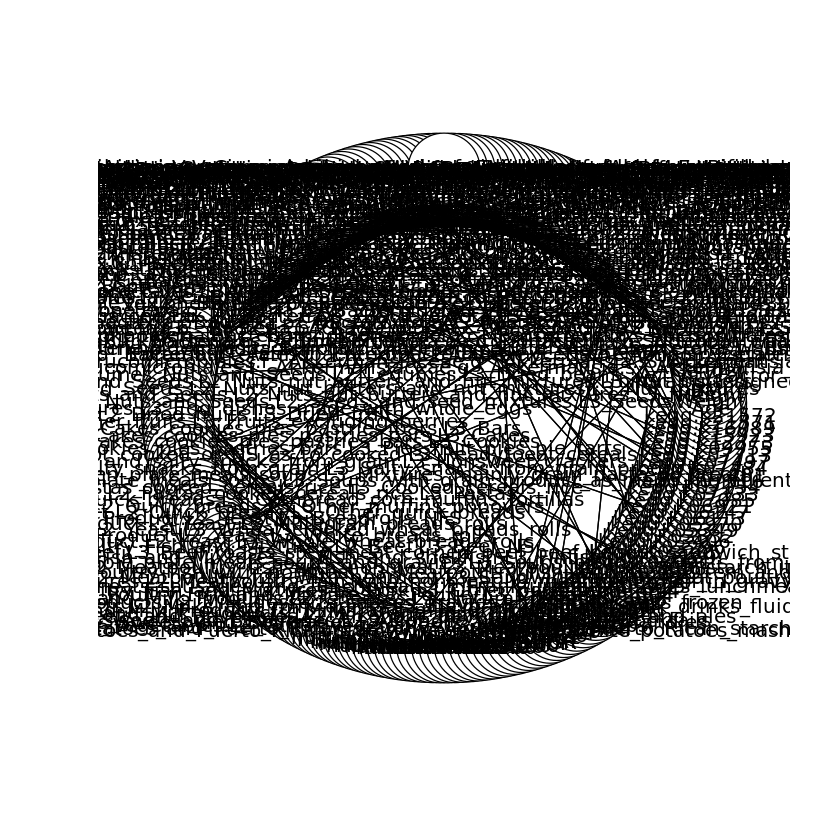

In [16]:
learn.dag <- function() {
    cl = makeCluster(40, type = "SOCK")
    # dag = si.hiton.pc(data_small, cluster = cl, blacklist = blacklist_small, alpha = 0.05, test="mi-cg")
#     dag = si.hiton.pc(data_small, cluster = cl, blacklist = blacklist_small, alpha=0.05, undirected=T, test="cor")
    dag = si.hiton.pc(data, cluster = cl, blacklist = blacklist_small, alpha=0.05, undirected=T)
    # dag = si.hiton.pc(data_small, blacklist = blacklist_small, alpha = 0.05)
    on.exit(stopCluster(cl))
    return(dag)
}


start_time <- Sys.time()
dag <- learn.dag()
end_time <- Sys.time()
amat.data = amat(dag)
plot(dag)
write.table(amat.data, "../results/dag.prediction.train.response.updated.csv", sep="\t")
print(end_time - start_time)

In [17]:
dag


  Bayesian network learned via Constraint-based methods

  model:
    [undirected graph]
  nodes:                                 223 
  arcs:                                  193 
    undirected arcs:                     193 
    directed arcs:                       0 
  average markov blanket size:           1.73 
  average neighbourhood size:            1.73 
  average branching factor:              0.00 

  learning algorithm:                    Semi-Interleaved HITON-PC 
  conditional independence test:         Mutual Information (cond. Gauss.) 
  alpha threshold:                       0.05 
  tests used in the learning procedure:  406486 


In [18]:
colnames(data)

[1] "StudyDayNo"                                                                                                                                                        
  [2] "tax.k__Bacteria.p__Actinobacteriota.c__Actinomycetia.o__Actinomycetales.f__Bifidobacteriaceae.g__Bifidobacterium.s__Bifidobacterium_bifidum"                       
  [3] "tax.k__Bacteria.p__Actinobacteriota.c__Actinomycetia.o__Actinomycetales.f__Bifidobacteriaceae.g__Bifidobacterium.s__Bifidobacterium_pseudocatenulatum"             
  [4] "tax.k__Bacteria.p__Actinobacteriota.c__Coriobacteriia.o__Coriobacteriales.f__Coriobacteriaceae.g__Collinsella.s__Collinsella_sp003466125"                          
  [5] "tax.k__Bacteria.p__Bacteroidota.c__Bacteroidia.o__Bacteroidales.f__Bacteroidaceae.g__Prevotella.s__Prevotella_sp003447235"                                         
  [6] "tax.k__Bacteria.p__Bacteroidota.c__Bacteroidia.o__Bacteroidales.f__Bacteroidaceae.g__Prevotella.s__Prevotella_sp900313215"                                         
  [7] "tax.k__Bacteria.p__Bacteroidota.c__Bacteroidia.o__Bacteroidales.f__Barnesiellaceae.g__Barnesiella.s__Barnesiella_sp003150885"                                      
  [8] "tax.k__Bacteria.p__Bacteroidota.c__Bacteroidia.o__Bacteroidales.f__Rikenellaceae.g__Alistipes_A.s__Alistipes_A_ihumii"                                             
  [9] "tax.k__Bacteria.p__Bacteroidota.c__Bacteroidia.o__Bacteroidales.f__Rikenellaceae.g__Alistipes_A.s__Alistipes_A_indistinctus"                                       
 [10] "tax.k__Bacteria.p__Bacteroidota.c__Bacteroidia.o__Bacteroidales.f__Rikenellaceae.g__Alistipes_A.s__Alistipes_A_sp900240235"                                        
 [11] "tax.k__Bacteria.p__Bacteroidota.c__Bacteroidia.o__Bacteroidales.f__UBA11471.g__UBA11471.s__UBA11471_sp000434215"                                                   
 [12] "tax.k__Bacteria.p__Bacteroidota.c__Bacteroidia.o__Flavobacteriales.f__UBA1820.g__UBA1820.s__UBA1820_sp002314265"                                                   
 [13] "tax.k__Bacteria.p__Desulfobacterota.c__Desulfovibrionia.o__Desulfovibrionales.f__Desulfovibrionaceae.g__Mailhella.s__Mailhella_sp900541395"                        
 [14] "tax.k__Bacteria.p__Firmicutes_A.c__Clostridia.o__Lachnospirales.f__Lachnospiraceae.g__Agathobacter.s__Agathobacter_sp000434275"                                    
 [15] "tax.k__Bacteria.p__Firmicutes_A.c__Clostridia.o__Lachnospirales.f__Lachnospiraceae.g__Blautia.s__Blautia_sp900541955"                                              
 [16] "tax.k__Bacteria.p__Firmicutes_A.c__Clostridia.o__Lachnospirales.f__Lachnospiraceae.g__Lachnospira.s__Lachnospira_sp000436535"                                      
 [17] "tax.k__Bacteria.p__Firmicutes_A.c__Clostridia.o__Lachnospirales.f__Lachnospiraceae.g__Lachnospira.s__Lachnospira_sp000437735"                                      
 [18] "tax.k__Bacteria.p__Firmicutes_A.c__Clostridia.o__Lachnospirales.f__Lachnospiraceae.g__Lachnospira.s__Lachnospira_sp900316325"                                      
 [19] "tax.k__Bacteria.p__Firmicutes_A.c__Clostridia.o__Oscillospirales.f__Acutalibacteraceae.g__CAG_217.s__CAG_217_sp000436335"                                          
 [20] "tax.k__Bacteria.p__Firmicutes_A.c__Clostridia.o__Oscillospirales.f__Acutalibacteraceae.g__Eubacterium_R.s__Eubacterium_R_sp003526845"                              
 [21] "tax.k__Bacteria.p__Firmicutes_A.c__Clostridia.o__Oscillospirales.f__Acutalibacteraceae.g__UBA1691.s__UBA1691_sp900544375"                                          
 [22] "tax.k__Bacteria.p__Firmicutes_A.c__Clostridia.o__Oscillospirales.f__Butyricicoccaceae.g__Butyricicoccus.s__Butyricicoccus_sp900547195"                             
 [23] "tax.k__Bacteria.p__Firmicutes_A.c__Clostridia.o__Oscillospirales.f__CAG_272.g__CAG_448.s__CAG_448_sp003150135"                                                     
 [24] "tax.k__Bacteria.p__Firmicutes_A.c__Clostridia.o__Oscillospiral

In [ ]:
# blacklist